### Sneha Kelkar, Net ID: 2011086

# 1. Introduction
#### In this notebook, we will be training different models to classify the letter from different sound features provided in the dataset.
The dataset contains 617 features and 1 target variable, which is the letter.

# 2. Methods
####We will be training the following models:
1. KNN on the all features
2. KNN on the n_featrues obtained from PCA
3. SVM on the n_featrues obtained from PCA
4. Logistic Regression on the n_featrues obtained from PCA

  We will use GridSearchCV for optimization, and we will secure 95% of the variance using a multiclass logistic regression classifier with stochastic gradient descent (SGDClassifier).

  We will then evaluate the models using the error matrix and display the metrics for each model

  We will be using accuracy, precision, recall, f1-score and roc-auc score as evaluation metrics.

### Task 1: Training the KNN model on the 617 features

In [4]:
from google.colab import files
uploaded = files.upload()

Saving testing.csv to testing.csv
Saving training.csv to training.csv


In [2]:
import pandas as pd #Library for data manipulation
import numpy as np #Library for scientific computing
import matplotlib.pyplot as plt #Library for data visualization

In [5]:
df_train = pd.read_csv('training.csv')
df_test = pd.read_csv('testing.csv')

In [6]:
df_train.head()


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f609,f610,f611,f612,f613,f614,f615,f616,f617,Letter
0,-0.4394,-0.0930,0.1718,0.4620,0.6226,0.4704,0.3578,0.0478,-0.1184,-0.2310,...,0.4102,0.2052,0.3846,0.3590,0.5898,0.3334,0.6410,0.5898,-0.4872,1
1,-0.4348,-0.1198,0.2474,0.4036,0.5026,0.6328,0.4948,0.0338,-0.0520,-0.1302,...,0.0000,0.2954,0.2046,0.4772,0.0454,0.2046,0.4318,0.4546,-0.0910,1
2,-0.2330,0.2124,0.5014,0.5222,-0.3422,-0.5840,-0.7168,-0.6342,-0.8614,-0.8318,...,-0.1112,-0.0476,-0.1746,0.0318,-0.0476,0.1112,0.2540,0.1588,-0.4762,2
3,-0.3808,-0.0096,0.2602,0.2554,-0.4290,-0.6746,-0.6868,-0.6650,-0.8410,-0.9614,...,-0.0504,-0.0360,-0.1224,0.1366,0.2950,0.0792,-0.0072,0.0936,-0.1510,2
4,-0.3412,0.0946,0.6082,0.6216,-0.1622,-0.3784,-0.4324,-0.4358,-0.4966,-0.5406,...,0.1562,0.3124,0.2500,-0.0938,0.1562,0.3124,0.3124,0.2188,-0.2500,3


In [7]:
# Shuffling the data
num_samples = len(df_train)
shuffle_index = np.random.permutation(num_samples)
df_train = df_train.reset_index(drop=True)
df_train.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f609,f610,f611,f612,f613,f614,f615,f616,f617,Letter
0,-0.4394,-0.0930,0.1718,0.4620,0.6226,0.4704,0.3578,0.0478,-0.1184,-0.2310,...,0.4102,0.2052,0.3846,0.3590,0.5898,0.3334,0.6410,0.5898,-0.4872,1
1,-0.4348,-0.1198,0.2474,0.4036,0.5026,0.6328,0.4948,0.0338,-0.0520,-0.1302,...,0.0000,0.2954,0.2046,0.4772,0.0454,0.2046,0.4318,0.4546,-0.0910,1
2,-0.2330,0.2124,0.5014,0.5222,-0.3422,-0.5840,-0.7168,-0.6342,-0.8614,-0.8318,...,-0.1112,-0.0476,-0.1746,0.0318,-0.0476,0.1112,0.2540,0.1588,-0.4762,2
3,-0.3808,-0.0096,0.2602,0.2554,-0.4290,-0.6746,-0.6868,-0.6650,-0.8410,-0.9614,...,-0.0504,-0.0360,-0.1224,0.1366,0.2950,0.0792,-0.0072,0.0936,-0.1510,2
4,-0.3412,0.0946,0.6082,0.6216,-0.1622,-0.3784,-0.4324,-0.4358,-0.4966,-0.5406,...,0.1562,0.3124,0.2500,-0.0938,0.1562,0.3124,0.3124,0.2188,-0.2500,3


In [8]:
#Training the KNN model on the 617 features
from sklearn.neighbors import KNeighborsClassifier
X_train = df_train.drop('Letter', axis=1)
y_train = df_train['Letter']

X_test = df_test.drop('Letter', axis=1)
y_test = df_test['Letter']

knn = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV

param_grid = [
 {'n_neighbors': [3, 5, 7, 9, 11],
  'weights': ['uniform', 'distance'],
  'metric': ['euclidean', 'manhattan', 'minkowski'],
  'n_jobs': [-1],
  'leaf_size': [10, 20, 30]}
]

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'leaf_size': [10, 20, 30],
                          'metric': ['euclidean', 'manhattan', 'minkowski'],
                          'n_jobs': [-1], 'n_neighbors': [3, 5, 7, 9, 11],
                          'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy')

In [9]:
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters:  {'leaf_size': 10, 'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 7, 'weights': 'distance'}
Best cross-validation score: 0.92


In [10]:
best_knn = grid_search.best_estimator_


### Task 2: Training the KNN with PCA
Perform PCA on the data and based on the visualization we will decide what number of components to keep

170 components of the total 617 components account for 95% of variance


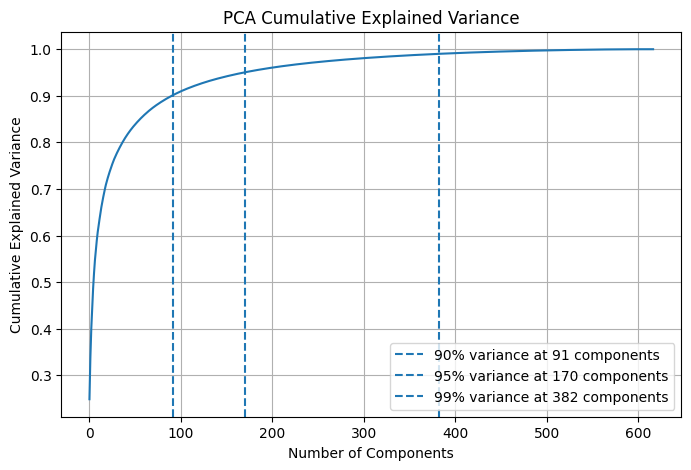

In [11]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)

CUMSUM = np.cumsum(pca.explained_variance_ratio_)
# print out how many components explain at least 95% of the variance
n_min = np.argmax(CUMSUM >= 0.95) + 1
print(n_min,"components of the total", len(CUMSUM), "components account for 95% of variance")
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components for 90%, 95%, and 99% of explained variance
thresholds = [0.9, 0.95, 0.99]
components_needed = [np.searchsorted(cumulative_variance, x) + 1 for x in thresholds]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance')

# Adding vertical lines for each threshold
for component, threshold in zip(components_needed, thresholds):
 plt.axvline(x=component, linestyle='--', label=f'{int(threshold*100)}% variance at {component} components')

plt.legend()
plt.grid(True)
plt.show()

### Based on the visualization we will keep 95% of the variance by using 170 components

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=n_min)

X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [13]:
knn = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV

param_grid = [
 {'n_neighbors': [3, 5, 7, 9, 11],
  'weights': ['uniform', 'distance'],
  'metric': ['euclidean', 'manhattan', 'minkowski'],
  'n_jobs': [-1],
  'leaf_size': [10, 20, 30]}
]

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)
grid_search.fit(X_train_reduced, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'leaf_size': [10, 20, 30],
                          'metric': ['euclidean', 'manhattan', 'minkowski'],
                          'n_jobs': [-1], 'n_neighbors': [3, 5, 7, 9, 11],
                          'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy')

In [14]:
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters:  {'leaf_size': 10, 'metric': 'manhattan', 'n_jobs': -1, 'n_neighbors': 7, 'weights': 'distance'}
Best cross-validation score: 0.92


In [34]:
best_knn_pca = grid_search.best_estimator_

### Task 3: Training the SVM with PCA

In [18]:
from sklearn.svm import SVC
svm = SVC()
param_grid = [
 {'C': [0.1, 1, 10, 100],
  'gamma': [0.01, 0.1, 1, 10],
  'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
  'probability' : [True]}
]
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)
grid_search.fit(X_train_reduced, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10],
                          'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
                          'probability': [True]}],
             return_train_score=True, scoring='accuracy')

In [19]:
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf', 'probability': True}
Best cross-validation score: 0.97


In [20]:
best_svm_pca = SVC(**grid_search.best_params_)
best_svm_pca.fit(X_train_reduced, y_train)


SVC(C=10, gamma=0.01, probability=True)

###Task 4: Training a Stochastic Gradient Descent Logistic model with the SGDClassifier algorithm .



In [22]:
from sklearn.linear_model import SGDClassifier
log_reg = SGDClassifier()
param_grid = [
 {'loss': ['log_loss'],
  'penalty': ['l2', 'l1', 'elasticnet'],
  'alpha': [0.0001, 0.001, 0.01, 0.1],
  'max_iter': [1000, 2000, 3000],
  'n_jobs': [-1]}
]
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', return_train_score=True, n_jobs= -1)
grid_search.fit(X_train_reduced, y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(), n_jobs=-1,
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1],
                          'loss': ['log_loss'], 'max_iter': [1000, 2000, 3000],
                          'n_jobs': [-1],
                          'penalty': ['l2', 'l1', 'elasticnet']}],
             return_train_score=True, scoring='accuracy')

In [23]:
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters:  {'alpha': 0.0001, 'loss': 'log_loss', 'max_iter': 1000, 'n_jobs': -1, 'penalty': 'elasticnet'}
Best cross-validation score: 0.94


In [24]:
best_log_reg_pca = grid_search.best_estimator_

### Task 5 is already completed because the models were optimized
### Task 6: Evaluating the error matrix

<Figure size 1800x1800 with 0 Axes>

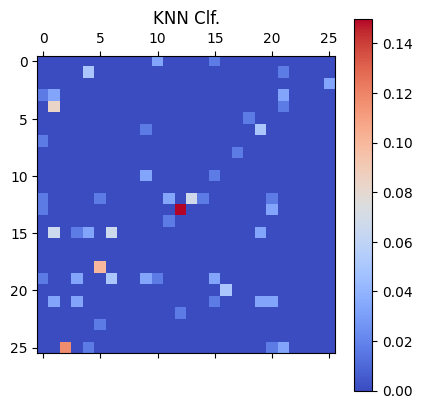

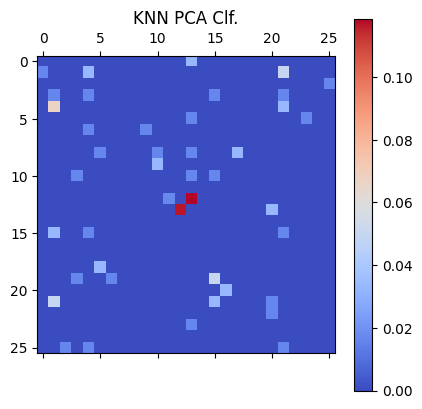

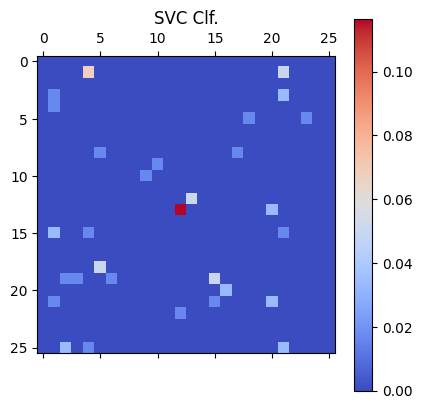

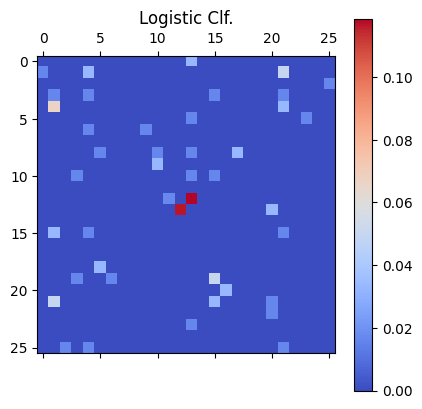

In [31]:
from sklearn.metrics import confusion_matrix

best_knn_pca = grid_search.best_estimator_

Y_pred_A = best_knn.predict(X_test)
CM_A = confusion_matrix(y_test, Y_pred_A)

Y_pred_B = best_knn_pca.predict(X_test_reduced)
CM_B = confusion_matrix(y_test, Y_pred_B)

Y_pred_C = best_svm_pca.predict(X_test_reduced)
CM_C = confusion_matrix(y_test, Y_pred_C)

Y_pred_D = best_log_reg_pca.predict(X_test_reduced)
CM_D = confusion_matrix(y_test, Y_pred_D)

CM_A = CM_A.astype('float') / CM_A.sum(axis=1)[:, np.newaxis]
CM_B = CM_B.astype('float') / CM_B.sum(axis=1)[:, np.newaxis]
CM_C = CM_C.astype('float') / CM_C.sum(axis=1)[:, np.newaxis]
CM_D = CM_D.astype('float') / CM_D.sum(axis=1)[:, np.newaxis]

np.fill_diagonal(CM_A,0)
np.fill_diagonal(CM_B,0)
np.fill_diagonal(CM_C,0)
np.fill_diagonal(CM_D,0)

plt.figure(1, figsize=(18, 18))
plt.matshow(CM_A, cmap=plt.cm.coolwarm)
plt.title('KNN Clf.')
plt.tight_layout
plt.colorbar()
plt.show()
plt.matshow(CM_B, cmap=plt.cm.coolwarm)
plt.title('KNN PCA Clf.')
plt.tight_layout
plt.colorbar()
plt.show()
plt.matshow(CM_C, cmap=plt.cm.coolwarm)
plt.title('SVC Clf.')
plt.tight_layout
plt.colorbar()
plt.show()
plt.matshow(CM_D, cmap=plt.cm.coolwarm)
plt.title('Logistic Clf.')
plt.tight_layout
plt.colorbar()
plt.show()

In [32]:
Y_pred_A = best_knn.predict(X_test)
Y_pred_B = best_knn_pca.predict(X_test_reduced)
Y_pred_C = best_svm_pca.predict(X_test_reduced)
Y_pred_D = best_log_reg_pca.predict(X_test_reduced)

###Here the SVC and the logistic regression seem to outperform the KNN models on the earlier and middle letters

###Task 7: Displaying the metrics for each model

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
for i in range(0,4):
 if (i==0):
  name = 'KNN'
  Y_pred = Y_pred_A
  y_pred_prob = best_knn.predict_proba(X_test)
 if (i==1):
  name = 'KNN PCA'
  Y_pred = Y_pred_B
  y_pred_prob = best_knn_pca.predict_proba(X_test_reduced)
 if (i==2):
  name = 'SVC PCA'
  Y_pred = Y_pred_C
  y_pred_prob = best_svm_pca.predict_proba(X_test_reduced)
 if (i==3):
  name = 'Logistic Classification PCA'
  Y_pred = Y_pred_D
  y_pred_prob = best_log_reg_pca.predict_proba(X_test_reduced)

 acc = accuracy_score(y_test, Y_pred)
 prec= precision_score(y_test, Y_pred,average='macro')
 recl= recall_score(y_test, Y_pred,average='macro')
 f1sc= f1_score(y_test, Y_pred,average='macro')
 roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='macro')
 print('%s: acc= %1.4f \t prec=%1.4f \t rec=%1.4f \t f1=%1.4f \t roc_auc=%1.4f' %(name, acc, prec, recl, f1sc, roc_auc))

KNN: acc= 0.9307 	 prec=0.9319 	 rec=0.9307 	 f1=0.9301 	 roc_auc=0.9934
KNN PCA: acc= 0.9525 	 prec=0.9538 	 rec=0.9525 	 f1=0.9528 	 roc_auc=0.9980
SVC PCA: acc= 0.9654 	 prec=0.9663 	 rec=0.9654 	 f1=0.9653 	 roc_auc=0.9996
Logistic Classification PCA: acc= 0.9525 	 prec=0.9538 	 rec=0.9525 	 f1=0.9528 	 roc_auc=0.9980


# 3. Results

### Based on these results, the SVC PCA model seems to be the best model on every metric followed by the logistic regression model then the SDGCLassifer evaluation model and finally the KNN model.